# 第4章 PandasとMatplotlibを使ってみよう
## 4.1 データのダウンロード

In [22]:
import pandas_datareader.data as web
start="1949/5/16"
end="2016/9/30"#適当に入れ替えてください。
N225 = web.DataReader("NIKKEI225", 'fred',start,end)
N225.head(1)

,NIKKEI225
DATE,
1949-05-16,176.21


In [23]:
N225.tail(1)

,NIKKEI225
DATE,
2016-09-30,16449.84


Text(0,0.5,'N225 index')

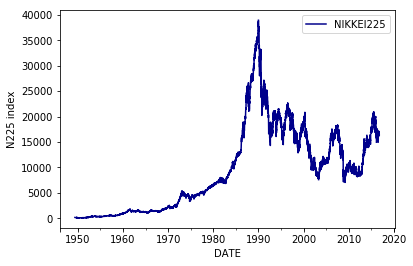

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
N225.plot(color='darkblue')
plt.ylabel('N225 index')

Text(0,0.5,'N225 index')

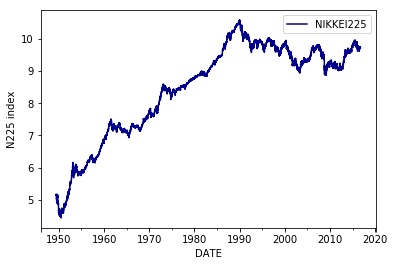

In [25]:
%matplotlib inline
import numpy as np
np.log(N225).plot(color='darkblue')
plt.ylabel('N225 index')

plt.show()を追加することにより出力の仕方が変わりました。

## 4.2 データベースの加工

In [27]:
import pandas as pd
fx = web.DataReader('DEXJPUS',"fred",start,end)
port=pd.concat([price.Close,fx],axis=1).dropna()

Text(0,0.5,'correlation')

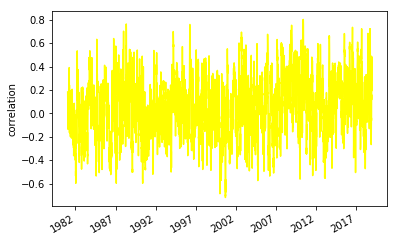

In [28]:
n=port.Close.pct_change().dropna()
f=port.DEXJPUS.pct_change().dropna()
f.rolling(window=20).corr(n).plot(color="yellow")
plt.ylabel('correlation')

In [26]:
import datetime
end=datetime.datetime.now()
start="1980/1/1"
price = web.DataReader("AAPL", 'yahoo',start,end)

                  High         Low        Open       Close      Volume  \
Date                                                                     
2015-01-02  111.440002  107.349998  111.389999  109.330002  53204600.0   
2015-01-05  108.650002  105.410004  108.290001  106.250000  64285500.0   

             Adj Close  
Date                    
2015-01-02  101.963631  
2015-01-05   99.091148  


Text(0,0.5,'apple')

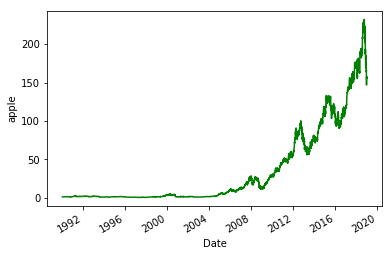

In [29]:
price1=price.loc["1990/1/1":]#ixの停止によりlocに変更
price1.Close.plot(color='green')
price2=price["2015"].iloc[0:2]#ixの停止によりilocに変更
print(price2)
plt.ylabel('apple')

In [15]:
print(price.resample('M').first().tail())

                  High         Low        Open       Close      Volume  \
Date                                                                     
2018-09-30  229.179993  226.630005  228.410004  228.360001  27390100.0   
2018-10-31  229.419998  226.350006  227.949997  227.259995  23600800.0   
2018-11-30  222.360001  216.809998  219.050003  222.220001  58323200.0   
2018-12-31  184.940002  181.210007  184.460007  184.820007  40802500.0   
2019-01-31  155.533295  154.229996  154.889999  155.199997   4893202.0   

             Adj Close  
Date                    
2018-09-30  227.565979  
2018-10-31  226.469803  
2018-11-30  221.447327  
2018-12-31  184.820007  
2019-01-31  155.199997  


In [16]:
print(price.resample('M').last().tail())

                  High         Low        Open       Close      Volume  \
Date                                                                     
2018-09-30  225.839996  224.020004  224.789993  225.740005  22929400.0   
2018-10-31  220.449997  216.619995  216.880005  218.860001  38358900.0   
2018-11-30  180.330002  177.029999  180.289993  178.580002  39531500.0   
2018-12-31  159.360001  156.479996  158.529999  157.740005  34509000.0   
2019-01-31  155.533295  154.229996  154.889999  155.199997   4893202.0   

             Adj Close  
Date                    
2018-09-30  224.955093  
2018-10-31  218.099014  
2018-11-30  178.580002  
2018-12-31  157.740005  
2019-01-31  155.199997  


In [17]:
print(price.resample('M',loffset='1d').last().tail())

                  High         Low        Open       Close      Volume  \
Date                                                                     
2018-10-01  225.839996  224.020004  224.789993  225.740005  22929400.0   
2018-11-01  220.449997  216.619995  216.880005  218.860001  38358900.0   
2018-12-01  180.330002  177.029999  180.289993  178.580002  39531500.0   
2019-01-01  159.360001  156.479996  158.529999  157.740005  34509000.0   
2019-02-01  155.533295  154.229996  154.889999  155.199997   4893202.0   

             Adj Close  
Date                    
2018-10-01  224.955093  
2018-11-01  218.099014  
2018-12-01  178.580002  
2019-01-01  157.740005  
2019-02-01  155.199997  


Text(0,0.5,'apple')

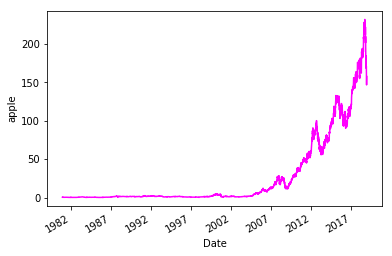

In [18]:
price.resample('A').Close.plot(color='magenta')
plt.ylabel('apple')

## 4.3 データの加工、分析


In [19]:
import numpy as np
dp=np.log(price.Close).diff()
vol=dp.std()*np.sqrt(250)
print(vol,len(price))

0.46400684852942237 9595


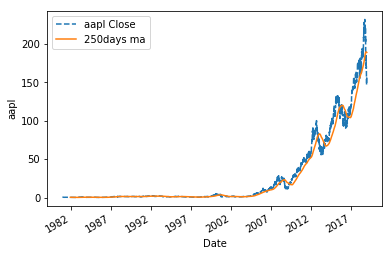

In [20]:
import pandas as pd
ma=pd.Series.rolling(price.Close,window=250).mean()
price.Close.plot(label='aapl Close',style='--')
ma.plot(label='250days ma')
plt.ylabel('aapl')
plt.legend()

Text(0,0.5,'standrd deviation 250 days aapl')

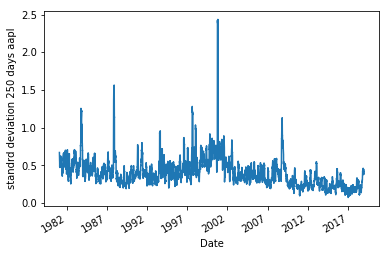

In [21]:
(pd.Series.rolling(np.log(price.Close).diff().dropna(),window=25).std()*np.sqrt(250)).plot()
plt.ylabel('standrd deviation 250 days aapl')